# SMOTE

In [3]:
import pandas as pd

In [4]:
dataset = pd.read_csv("c:\datos\DS_Credito Hipotecario_Sin_Nulls_Solo_Numeros.csv")

In [5]:
dataset.head()

,INGRESOS_SOLICITANTE,INGRESOS_COSOLICITANTE,MONTO_PRESTAMO_MILES,PLAZO_PRESTAMO_MESES,FLAG_CRED_HIPO
0,4583,1508.0,128,360,N
1,3000,0.0,66,360,Y
2,2583,2358.0,120,360,Y
3,6000,0.0,141,360,Y
4,5417,4196.0,267,360,Y


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 434 entries, 0 to 433
Data columns (total 5 columns):
INGRESOS_SOLICITANTE      434 non-null int64
INGRESOS_COSOLICITANTE    434 non-null float64
MONTO_PRESTAMO_MILES      434 non-null int64
PLAZO_PRESTAMO_MESES      434 non-null int64
FLAG_CRED_HIPO            434 non-null object
dtypes: float64(1), int64(3), object(1)
memory usage: 17.0+ KB


In [7]:
dataset.groupby("FLAG_CRED_HIPO").agg("size")

FLAG_CRED_HIPO
N    131
Y    303
dtype: int64

In [8]:
import seaborn as sns
#permite visualización de las librearias de ploteo de ploteo en jupyter
%matplotlib inline

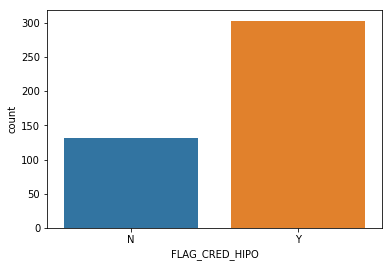

In [9]:
sns.countplot(x="FLAG_CRED_HIPO", data = dataset)

In [10]:
## la calase minoritaria es "N"
t = dataset[["FLAG_CRED_HIPO"]]
n_samples = t.shape[0]
n_samples_Y = (t=="Y").sum()
n_samples_N = (t=="N").sum()

In [11]:
n_samples_N_new = 0.50*n_samples_Y/(0.5)-n_samples_N

In [12]:
n_samples_N_new

FLAG_CRED_HIPO    172.0
dtype: float64

In [13]:
# Seleccionando los puntos base para la nueva data SMOTE
sel_ = dataset.loc[dataset["FLAG_CRED_HIPO"] == "N"].iloc[:,:-1].sample(n=int(n_samples_N_new),replace=True,random_state=10)

In [14]:
import numpy as np

steps = np.random.uniform(size = in(n_samples_N_new[0]))

def random_row_df(df)
    index_random = random.choise(range(len(df)))
    i = 0
    for index, row in df.interrows():
        if i==index_random:
            d={}
            index =row.index.tolist()
            values = row.values.tolist()
            for j in range(len(indexs))
                d[index[j]] = [values[j]]
            df_row = pd.DataFrame(d)
            break
        i = i + 1
    return df_row
# generacion de nueva data (rows) con SMOTE

i = 0

df_news = None

for index , row in sel.iterrows():
    d = {}
    indexs = row.index.tolist()
    values = row-values.tolist()
    for j in range(len(indexs)):
        d[indexs[j]] = [values[j]]
        df_inicial = pd.DataFrame(d)
        
        step = steps[i]
        
        #SMOTE
        df_new = df_initial - step * (df_initial - random_row_df(sel_))
        
        # se concatena todos nuevos rows generados del SMOTE
        df_news = pd.concat([df_news , df_new])
        i = i +1
    
df_news["FLAG_CRED_HIPO"]="N"

dataset_smoted = pd.concat([dataset, df_news])

dataset_smoted.reset_index(drop = True , inplace = True)

dataset_smoted["PLAZO_PRESTAMO_MESES"] = dataset_smoted["PLAZO_PRESTAMO_MESES"] .astype(int)
dataset_smoted.head()

SyntaxError: invalid syntax (<ipython-input-14-d8734eef8f11>, line 3)